# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

200
    Date Revenue
0   2024   97.15
1   2023   96.77
2   2022   81.46
3   2021   53.82
4   2020   31.53
5   2019   24.57
6   2018   21.46
7   2017   11.75
8   2016    7.00
9   2015    4.04
10  2014    3.19
11  2013    2.01
12  2012    0.41
13  2011    0.20
14  2010    0.11
15  2009    0.11
/workspaces/web-scraping-project-tutorial-chematudela/src/Tesla.db


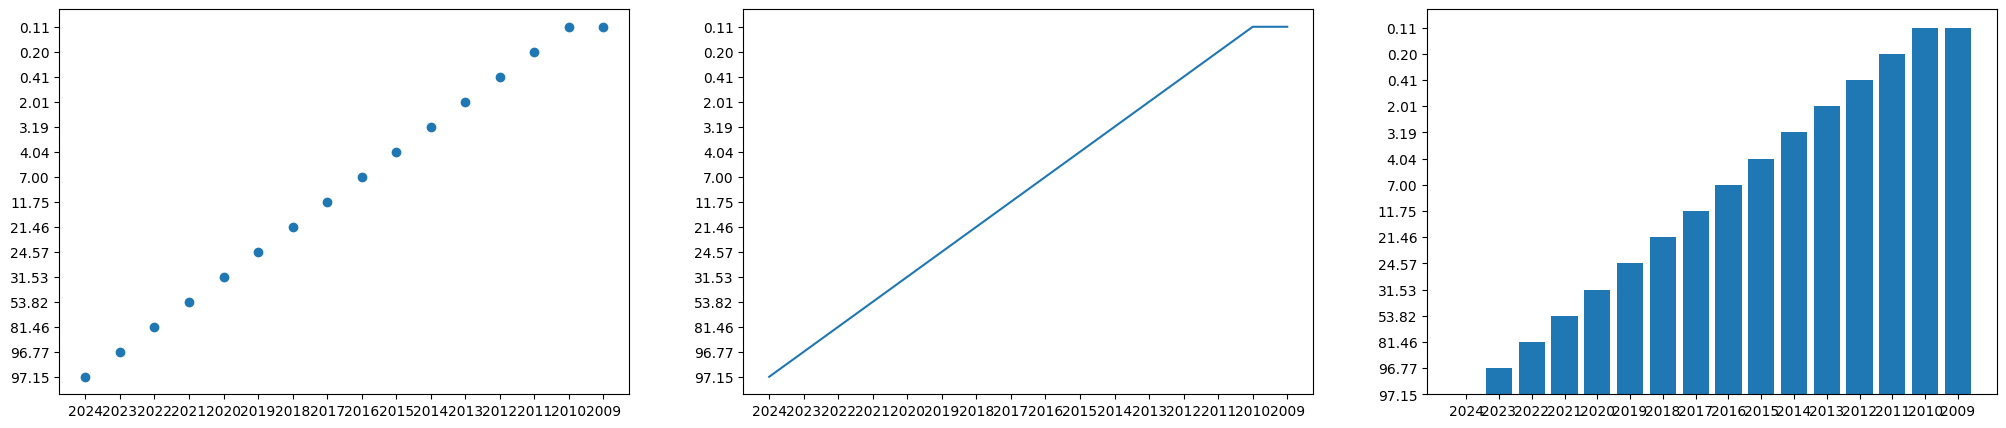

In [10]:



import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Paso 2: Descargamos el HTML de la url que nos han mandado por el grupo.  

url_ = 'https://companiesmarketcap.com/tesla/revenue/'

response = requests.get(url_)
print(response.status_code)

#Paso 3: 

#Utilizamos BeautigulSoup para estructurar la info. 

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

#Buscamos tablas dentro de soup

tablas_= soup.find_all('table')

#print(f'Aquí están todas las tablas {tablas_} aquí terminan las tablas')

#Seleccionamos la primera tabla que es la que buscamos

anual_reven = tablas_[0]



#genearmos el dataframe vacío con los nombres de las dos columnas

tesla_date_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

#generamos la lista con los valores "año"

years = [year.text.strip() for year in anual_reven.find_all(class_='year')]
#generamos la listra con los valores "revenue"
revenue = []
for row in anual_reven.tbody.find_all("tr"):
    col = row.find_all("td")
    revenue.append(col[1].text.replace("$", "").replace(" ", "").replace("B", ""))


#alimentamos el dataframe
tesla_date_revenue['Date'] = years
tesla_date_revenue['Revenue']= revenue

print(tesla_date_revenue)

#vamos a crear la base de datos en sqlite

conect = sqlite3.connect('Tesla.db')
conect
cursor = conect.cursor()

cursor.execute(''' CREATE TABLE date_revenue(Date,Revenue)''')

tesla_date_revenue.to_sql('date_revenue', conect, if_exists='append', index = True)

#como no sé muy bien donde se ha creado la DB, voy a ver su ubicación concreta.

db_path = os.path.abspath('Tesla.db')

print(db_path)

# Graficamos

fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].scatter(years,revenue)
axs[1].plot(years,revenue)
axs[2].bar(years,revenue)


plt.show()
